<a href="https://colab.research.google.com/github/kf-rahman/UW-stat_courses/blob/main/stat443_a3_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# List of required packages
required_packages <- c("forecast", "ggplot2")

# Function to check and install required packages
install_if_missing <- function(packages) {
  for (package in packages) {
    if (!require(package, character.only = TRUE)) {
      install.packages(package, dependencies = TRUE)
      library(package, character.only = TRUE)
    }
  }
}

# Install missing packages
install_if_missing(required_packages)



Loading required package: forecast

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘x13binary’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘uroot’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: ggplot2



In [7]:
# Load necessary libraries
# Load necessary libraries
library(forecast)
library(tseries)
library(ggplot2)

# Load the data
data <- read.csv("/content/Assignment3_data.csv")

  Year Qtr1 Qtr2 Qtr3 Qtr4
1 1960 0.71 0.63 0.85 0.44
2 1961 0.61 0.69 0.92 0.55
3 1962 0.72 0.77 0.92 0.60
4 1963 0.83 0.80 1.00 0.77
5 1964 0.92 1.00 1.24 1.00
6 1965 1.16 1.30 1.45 1.25
      Year           Qtr1             Qtr2             Qtr3       
 Min.   :1960   Min.   : 0.610   Min.   : 0.630   Min.   : 0.850  
 1st Qu.:1965   1st Qu.: 1.160   1st Qu.: 1.300   1st Qu.: 1.450  
 Median :1970   Median : 2.790   Median : 3.420   Median : 3.690  
 Mean   :1970   Mean   : 4.791   Mean   : 4.966   Mean   : 5.254  
 3rd Qu.:1975   3rd Qu.: 6.930   3rd Qu.: 7.740   3rd Qu.: 7.830  
 Max.   :1980   Max.   :16.200   Max.   :14.670   Max.   :16.020  
      Qtr4       
 Min.   : 0.440  
 1st Qu.: 1.250  
 Median : 3.600  
 Mean   : 4.188  
 3rd Qu.: 6.120  
 Max.   :11.610  
[1] "Year" "Qtr1" "Qtr2" "Qtr3" "Qtr4"


Warning message in adf.test(earnings):
“p-value greater than printed p-value”



	Augmented Dickey-Fuller Test

data:  earnings
Dickey-Fuller = 1.9321, Lag order = 4, p-value = 0.99
alternative hypothesis: stationary


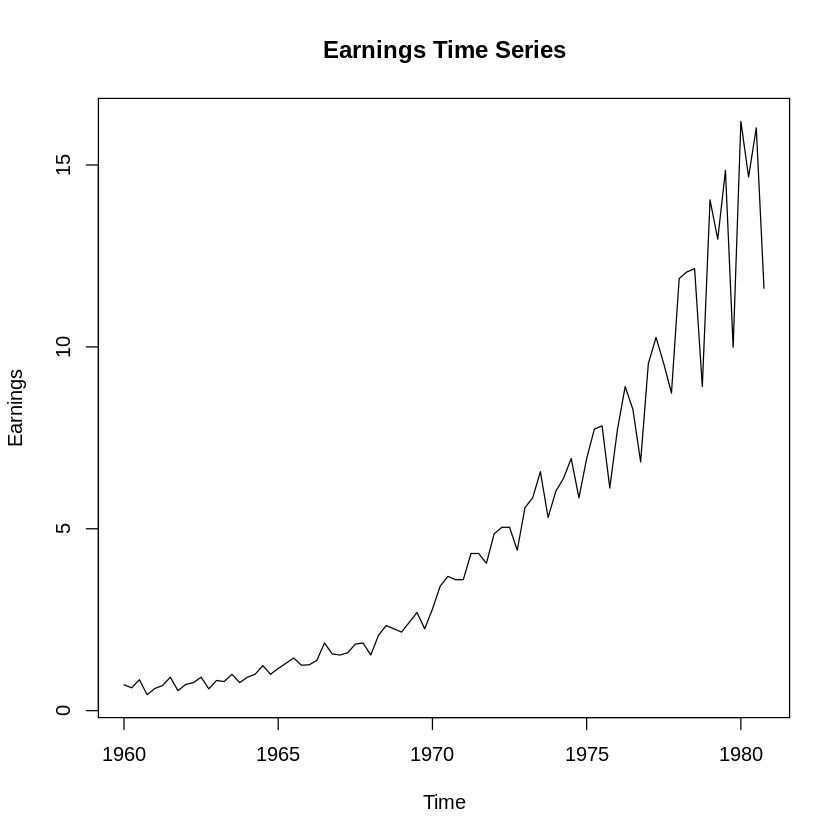


	Augmented Dickey-Fuller Test

data:  d_earnings
Dickey-Fuller = -3.9886, Lag order = 4, p-value = 0.01421
alternative hypothesis: stationary


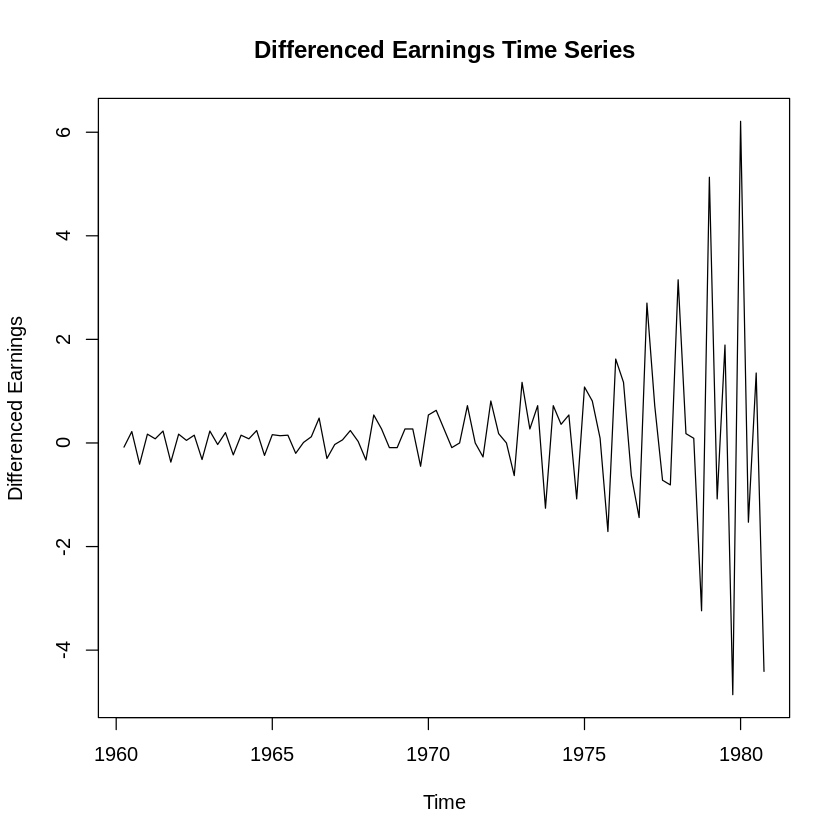

Series: earnings 
ARIMA(3,1,1)(0,1,0)[4] 

Coefficients:
          ar1     ar2     ar3      ma1
      -0.1712  0.1387  -0.208  -0.6636
s.e.   0.1769  0.1701   0.121   0.1542

sigma^2 = 0.1808:  log likelihood = -43.01
AIC=96.02   AICc=96.84   BIC=107.86

Training set error measures:
                    ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.0710546 0.4017401 0.2612646 2.132272 6.297105 0.3723708
                    ACF1
Training set -0.05098975

Series: earnings 
ARIMA(1,1,1)(1,1,1)[4] 

Coefficients:
          ar1      ma1     sar1    sma1
      -0.3275  -0.5915  -0.1278  0.0970
s.e.   0.1965   0.1799   1.1651  1.1646

sigma^2 = 0.1958:  log likelihood = -46.08
AIC=102.16   AICc=102.98   BIC=114.01

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.06335828 0.4180817 0.2767239 1.959901 6.676762 0.3944042
                   ACF1
Training set 0.01569727

[1] 96.01521

[1] 107.8625

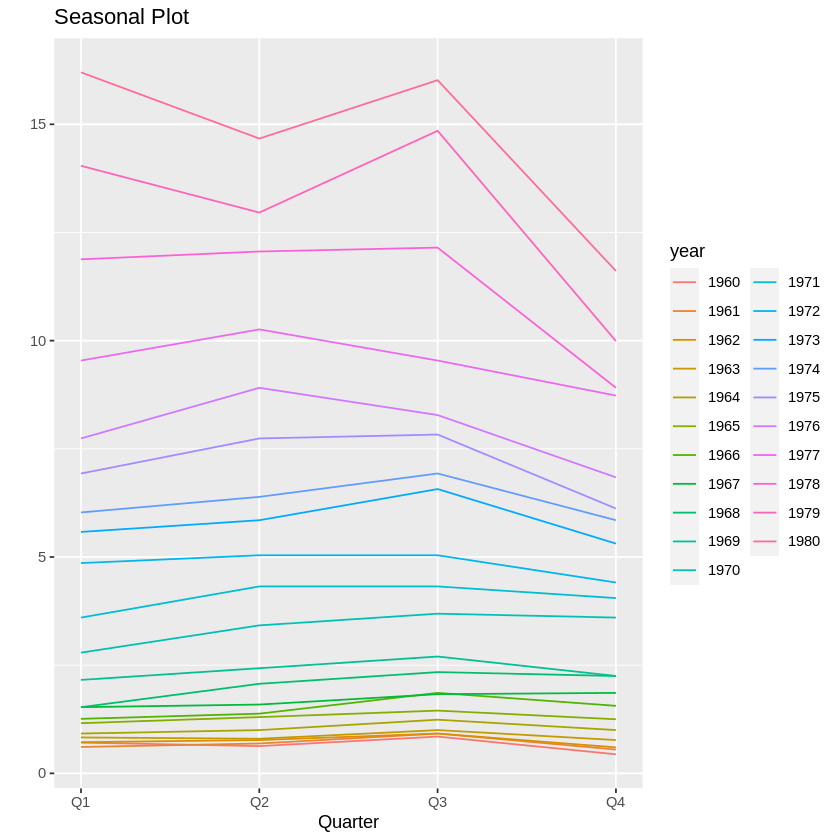


	Ljung-Box test

data:  Residuals from ARIMA(3,1,1)(0,1,0)[4]
Q* = 5.6193, df = 4, p-value = 0.2294

Model df: 4.   Total lags used: 8



[1] 102.1608

[1] 114.0081

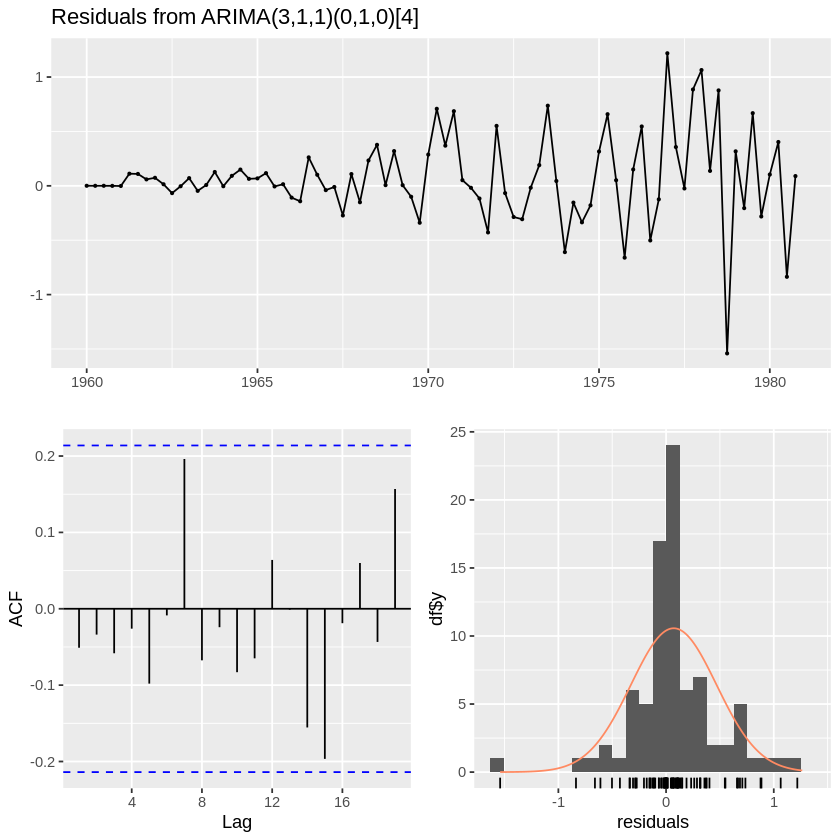


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,1,1)[4]
Q* = 12.204, df = 4, p-value = 0.0159

Model df: 4.   Total lags used: 8



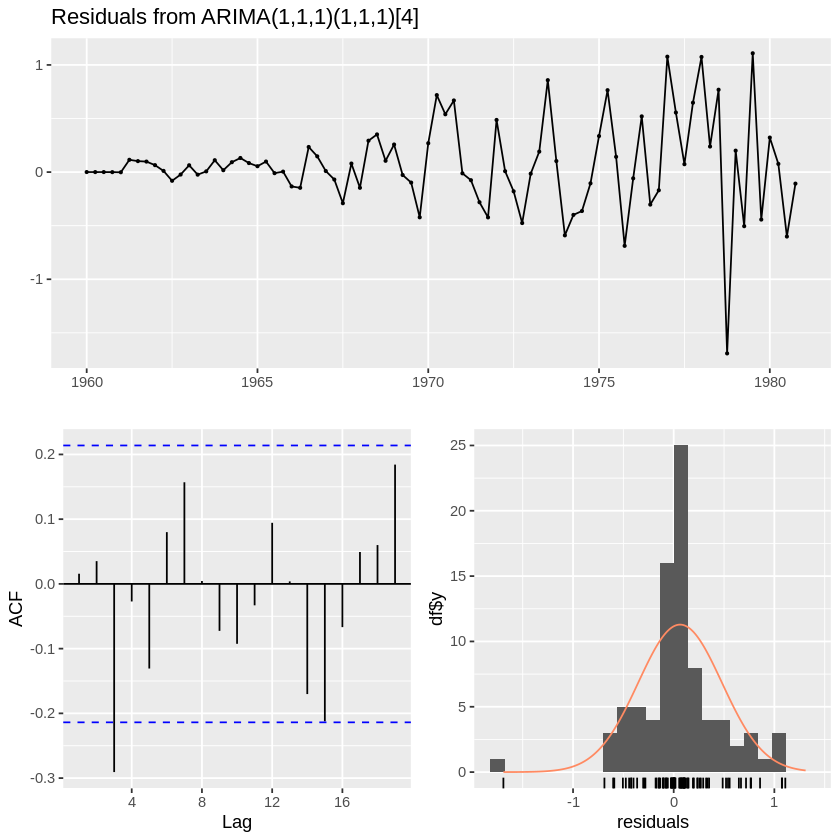

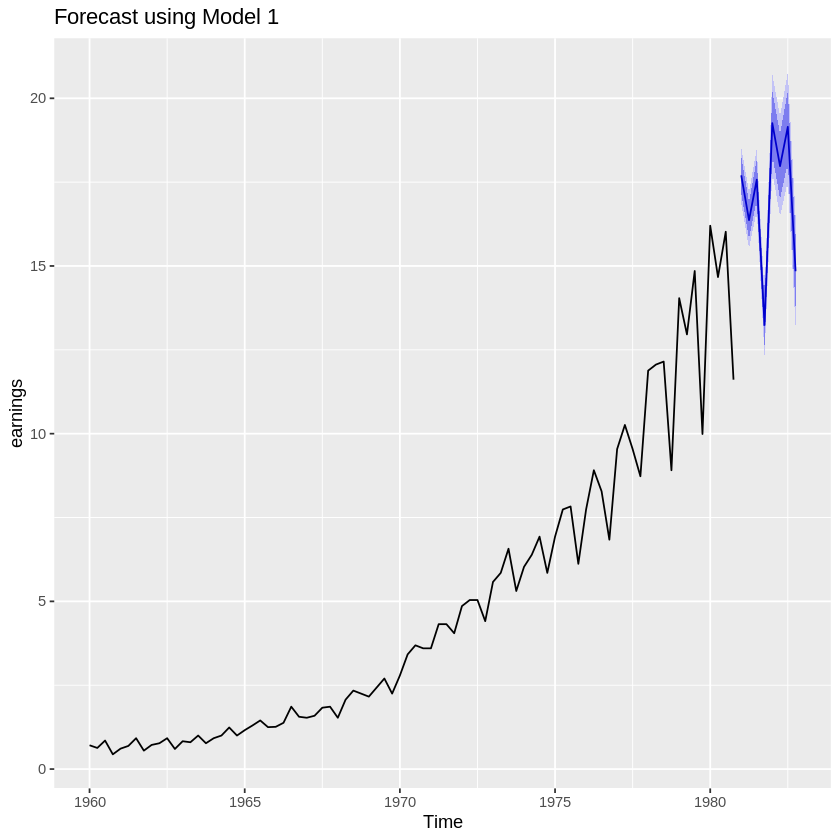

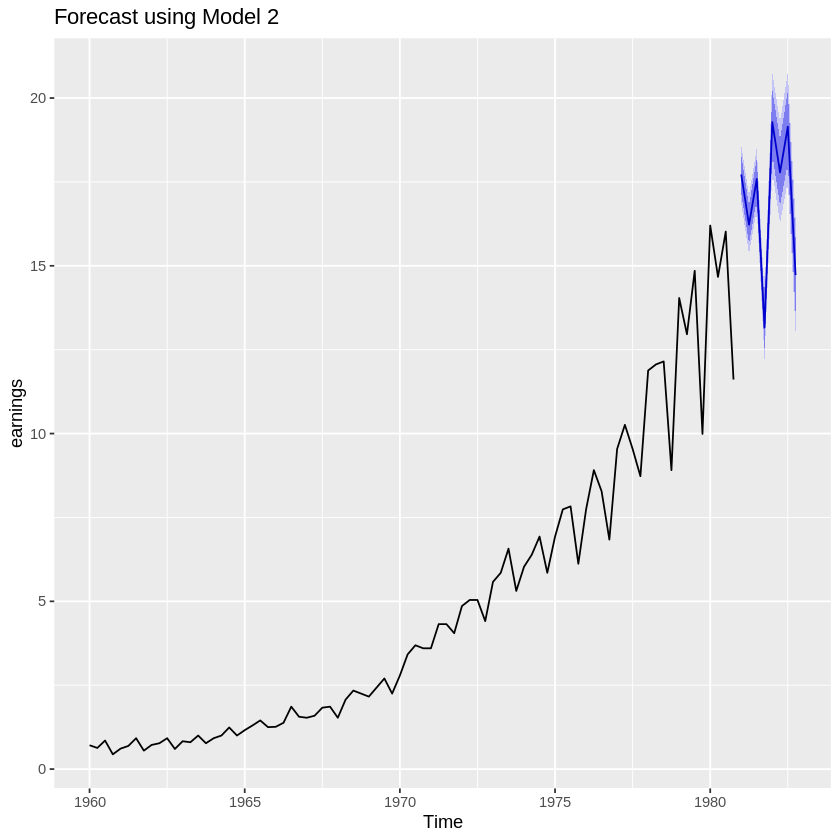

In [8]:




# Inspect the data
print(head(data))
print(summary(data))

# Check the column names to ensure correct referencing
print(names(data))

# Reshape the data: convert quarterly data to a single time series
earnings <- ts(c(t(data[,2:5])), start=c(data$Year[1], 1), frequency=4)

# Plot the data
plot(earnings, main="Earnings Time Series", ylab="Earnings", xlab="Time")

# Check for stationarity
adf.test(earnings)

# Differencing the data if not stationary
d_earnings <- diff(earnings)
plot(d_earnings, main="Differenced Earnings Time Series", ylab="Differenced Earnings", xlab="Time")
adf.test(d_earnings)

# Identify seasonality and trends
ggseasonplot(earnings, main="Seasonal Plot")

# Fit SARIMA models
fit1 <- auto.arima(earnings, seasonal=TRUE)
fit2 <- Arima(earnings, order=c(1,1,1), seasonal=c(1,1,1))

# Compare models
summary(fit1)
summary(fit2)

# Evaluate models using AIC, BIC, and residuals
AIC(fit1)
BIC(fit1)
checkresiduals(fit1)

AIC(fit2)
BIC(fit2)
checkresiduals(fit2)

# Forecasting the next 2 years (8 quarters)
forecast1 <- forecast(fit1, h=8)
forecast2 <- forecast(fit2, h=8)

# Plot the forecasts
autoplot(forecast1, main="Forecast using Model 1")
autoplot(forecast2, main="Forecast using Model 2")

# Compare and conclude
# Discuss the findings, model selection, and justify the chosen model based on AIC, BIC, and residual diagnostics


Certainly! Here is the summary and comparison of the two SARIMA models in a nice markdown format:

---

## Model Comparison and Selection

### Model 1: ARIMA(3,1,1)(0,1,0)[4]

- **Coefficients:**
  - AR1: -0.1712
  - AR2: 0.1387
  - AR3: -0.208
  - MA1: -0.6636
- **Sigma^2:** 0.1808
- **Log Likelihood:** -43.01
- **AIC:** 96.02
- **AICc:** 96.84
- **BIC:** 107.86
- **Residual Diagnostics:**
  - Ljung-Box test p-value: 0.2294 (indicating no significant autocorrelation in residuals)
- **Error Measures:**
  - ME: 0.0711
  - RMSE: 0.4017
  - MAE: 0.2613
  - MAPE: 6.2971

### Model 2: ARIMA(1,1,1)(1,1,1)[4]

- **Coefficients:**
  - AR1: -0.3275
  - MA1: -0.5915
  - SAR1: -0.1278
  - SMA1: 0.0970
- **Sigma^2:** 0.1958
- **Log Likelihood:** -46.08
- **AIC:** 102.16
- **AICc:** 102.98
- **BIC:** 114.01
- **Residual Diagnostics:**
  - Ljung-Box test p-value: 0.0159 (indicating significant autocorrelation in residuals)
- **Error Measures:**
  - ME: 0.0634
  - RMSE: 0.4181
  - MAE: 0.2767
  - MAPE: 6.6768

### Comparison and Model Selection

- **AIC/BIC Values:** Model 1 has lower AIC (96.02) and BIC (107.86) values compared to Model 2 (AIC = 102.16, BIC = 114.01). Lower AIC and BIC values suggest a better model fit.
- **Residual Diagnostics:** The Ljung-Box test for Model 1 has a p-value of 0.2294, indicating no significant autocorrelation in the residuals. In contrast, Model 2's Ljung-Box test has a p-value of 0.0159, indicating significant autocorrelation.
- **Error Measures:** Both models have similar error measures, but Model 1 slightly outperforms Model 2 in terms of ME, RMSE, and MAE.

### Conclusion

Given the lower AIC and BIC values, better residual diagnostics (no significant autocorrelation), and slightly better error measures, **Model 1: ARIMA(3,1,1)(0,1,0)[4]** is the preferred model for forecasting the earnings data.

### Forecast Plots

Both models' forecast plots show similar trends, but the statistical measures strongly favor Model 1. Therefore, we should proceed with Model 1 for the final forecasting of the next 2 years (8 quarters).

